Load Dataset & tools

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("datasets/Training.csv")
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


Gaining small insights from data

In [3]:
dataset.shape

(4920, 133)

In [4]:
len(dataset["prognosis"].unique())

41

In [5]:
dataset["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Train - Test Split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
X = dataset.drop("prognosis", axis=1)
y = dataset["prognosis"]

In [8]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [9]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [10]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [11]:
Y

array([15, 15, 15, ..., 38, 35, 27])

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [13]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

Training Models with different Algorithms (Best to be chosen)


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


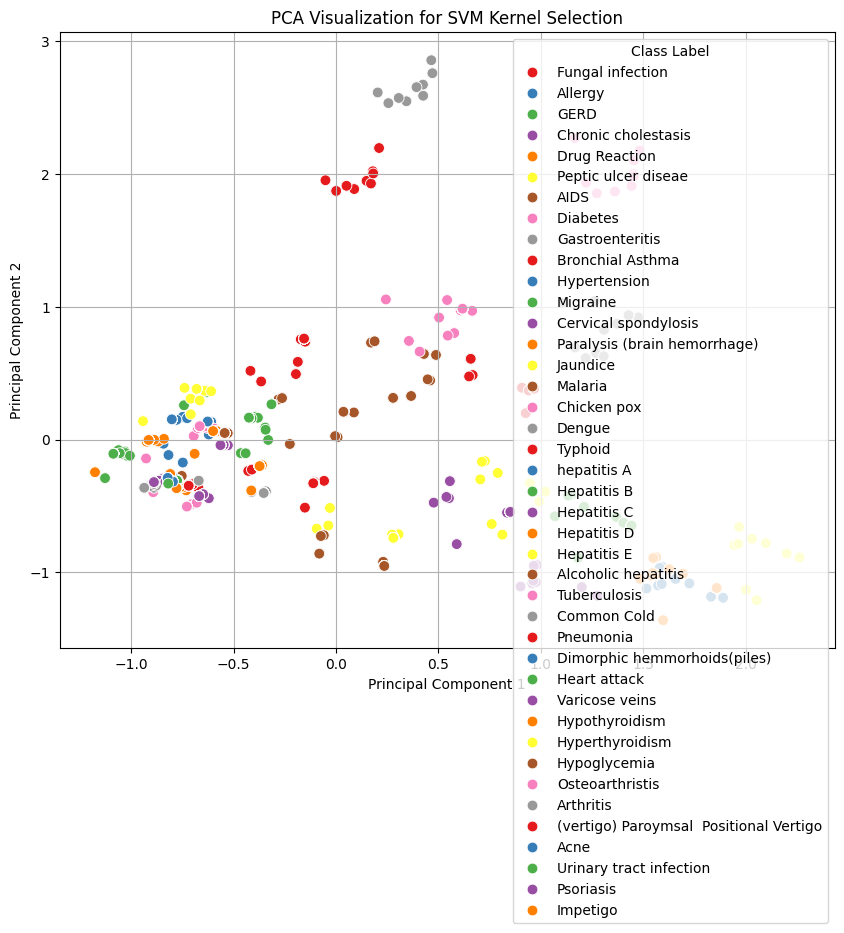

In [14]:
%pip install seaborn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Assuming X is your feature matrix and y is your target label
# X shape = (4920, 132)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)

# Visualize the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', s=60)

plt.title('PCA Visualization for SVM Kernel Selection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class Label')
plt.grid(True)
plt.show()



d:\copy_users\Documents\College\Projects\AI-Web based project\Software Developer Salary Prediction\venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


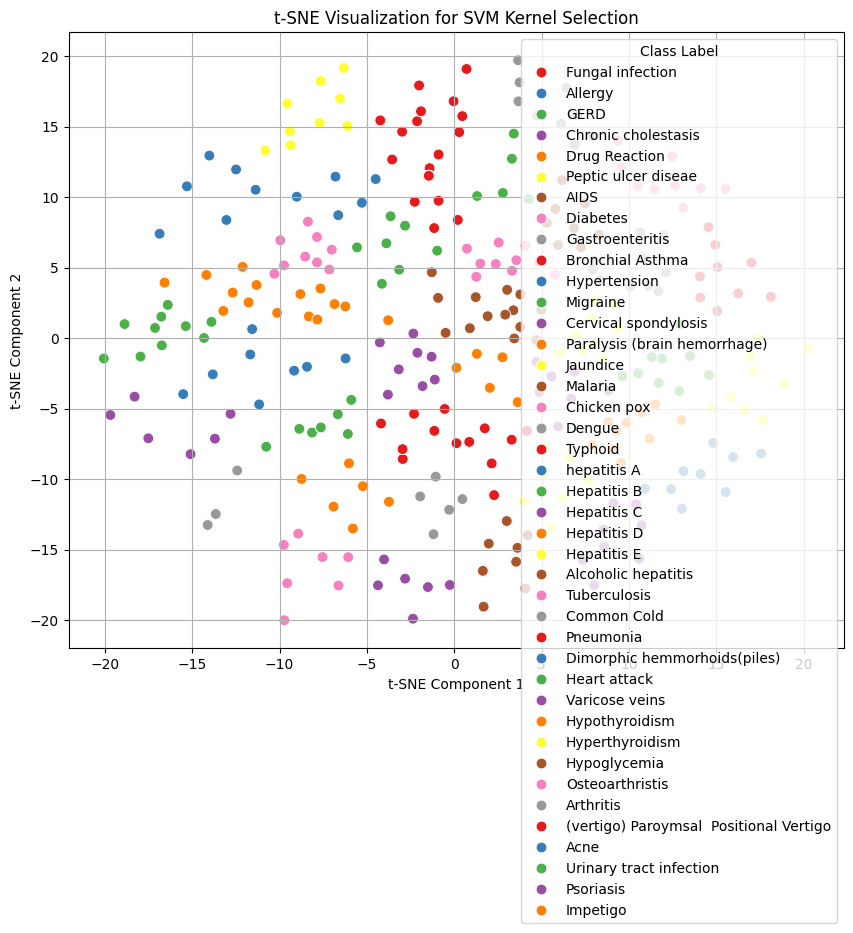

In [15]:
# Applying t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set1', s=60)

plt.title('t-SNE Visualization for SVM Kernel Selection')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Class Label')
plt.grid(True)
plt.show()


In [16]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create a dictionary to Store Models
models = {
    "SVC":SVC(kernel="linear"),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB": MultinomialNB()
}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(Y_test, predictions)

    cm = confusion_matrix(Y_test, predictions)

    print(f"{model_name} accuracy : {accuracy}")
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

SVC accuracy : 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
RandomForest accuracy : 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
GradientBoostingClassifier accuracy : 1.0
GradientBoostingClassifier Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
KNeighbors accuracy : 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0]

Single Predictions

In [17]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
ypred = svc.predict(X_test)
accuracy_score(Y_test, ypred)


1.0

In [18]:
import pickle
pickle.dump(svc, open("models/svc.pkl", 'wb'))

In [19]:
svc = pickle.load(open("models/svc.pkl", 'rb'))

In [20]:
# Test 1
print("Predicted Label:", svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Label:", Y_test[0])

Predicted Label: [40]
Actual Label: 40


d:\copy_users\Documents\College\Projects\AI-Web based project\Software Developer Salary Prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [21]:
# Test 2
print("Predicted Label:", svc.predict(X_test.iloc[32].values.reshape(1,-1)))
print("Actual Label:", Y_test[32])

Predicted Label: [37]
Actual Label: 37


d:\copy_users\Documents\College\Projects\AI-Web based project\Software Developer Salary Prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Recommendation System and Prediction


Load Database and use logic for recommendations

In [33]:
sys_des = pd.read_csv("datasets/symtoms_df.csv")
precautions = pd.read_csv("datasets/precautions_df.csv")
workout = pd.read_csv("datasets/workout_df.csv")
description = pd.read_csv("datasets/description.csv")
medication = pd.read_csv("datasets/medications.csv")
diets = pd.read_csv("datasets/diets.csv")
medicines = pd.read_csv("datasets/medicines.csv")

In [25]:
sys_des

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN
...,...,...,...,...,...,...
4915,4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements
4916,4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring
4917,4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine
4918,4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting


In [26]:
precautions

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,8,Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,9,(vertigo) Paroymsal Positional Vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [27]:
workout

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods
...,...,...,...,...
405,405,405,Impetigo,Consult a healthcare professional
406,406,406,Impetigo,Follow medical recommendations
407,407,407,Impetigo,Avoid scratching
408,408,408,Impetigo,Take prescribed antibiotics


In [28]:
description

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...
5,Peptic ulcer disease,Peptic ulcer disease involves sores that devel...
6,AIDS,AIDS (Acquired Immunodeficiency Syndrome) is a...
7,Diabetes,Diabetes is a chronic condition that affects h...
8,Gastroenteritis,Gastroenteritis is an inflammation of the stom...
9,Bronchial Asthma,Bronchial Asthma is a respiratory condition ch...


In [29]:
medication

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."
5,Peptic ulcer disease,"['Antibiotics', 'Proton Pump Inhibitors (PPIs)..."
6,AIDS,"['Antiretroviral drugs', 'Protease inhibitors'..."
7,Diabetes,"['Insulin', 'Metformin', 'Sulfonylureas', 'DPP..."
8,Gastroenteritis,"['Antibiotics', 'Antiemetic drugs', 'Antidiarr..."
9,Bronchial Asthma,"['Bronchodilators', 'Inhaled corticosteroids',..."


In [30]:
diets

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."
5,Peptic ulcer disease,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
6,AIDS,"['Balanced Diet', 'Protein-rich foods', 'Fruit..."
7,Diabetes,"['Low-Glycemic Diet', 'Fiber-rich foods', 'Lea..."
8,Gastroenteritis,"['Bland Diet', 'Bananas', 'Rice', 'Applesauce'..."
9,Bronchial Asthma,"['Anti-Inflammatory Diet', 'Omega-3-rich foods..."


In [34]:
medicines

,Disease,Medicine
0,Fungal infection,"['Flucos by Cipla', 'Sebifin by Sun Pharma', '..."
1,Allergy,"['Cetirizine by GSK', 'Phenylephrine by Cipla'..."
2,GERD,"['Digene by Abbott', 'Eno by GSK', 'Itopride b..."
3,Chronic cholestasis,"['Udiliv by Abbott', 'Methotrexate by Cipla', ..."
4,Drug Reaction,"['Cetrizine by GSK', 'EpiPen', 'Dexamethasone ..."
5,Peptic ulcer disease,"['Amoxicillin by GSK', 'Pantoprazole by Sun Ph..."
6,AIDS,"['Zidovudine by Zidovir', 'Atazanavir by Atazo..."
7,Diabetes,"['Insulin Aspart by NovoRapid', 'Metformin by ..."
8,Gastroenteritis,"['Amoxicillin by Amoxil, 'Granisetron by Grani..."
9,Bronchial Asthma,"['Salbutamol by Asthalin', 'Budesonide by Bude..."


In [32]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#Helper Function
def helper(dis):
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medication[medication['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    diet = diets[diets['Disease'] == dis]['Diet']
    diet = [diet for diet in diet.values]

    wokout = workout[workout['disease'] == dis]['workout']

    medicine = medicines[medicines['Disease'] == dis]['Medicine']
    medicine = [medicine for medicine in medicine.values]
    
    return desc, pre, med, diet, wokout, medicine

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction Function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))

    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]
            

In [36]:
# Using ast for printing linked list
# ast stands for Abstract Syntax Trees
import ast

In [49]:
# Test 1:
symptoms = input("Enter your symptoms....")
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [sym.strip("[]'") for sym in user_symptoms]
#get_predicted_value("itching,skin_rash,shivering")
#fatigue, itching, shivering, anxiety = Allergy
#shivering, chills, joint_pain, stomach_pain, acidity = Allergy
predicted_disease = get_predicted_value(user_symptoms)
desc, pre, med, diet, wokout, medicine = helper(predicted_disease)

print("****************PRIDICTION****************")
print("")
print("****************", predicted_disease, "****************")
print("")
print("****************DESCRIPTION****************")
print(desc)

print("****************PRECAUTIONS****************")
i = 1
for i1 in pre[0]:
    # "nan" values to be handled by isinstance
    # Iterated over the NumPy array and printed only 
    # the elements that are strings, filtering out the nan values
    if pd.notna(i1) and isinstance(i1, str):
        print(i, ": ", i1)
        i +=1

print("****************MEDICINE****************")
med1 = ast.literal_eval(med[0])
j = 1
for i2 in med1:
    if isinstance(i2, str):
        print(j, ": ", i2)
        j +=1

print("****************DIET****************")
diet1 = ast.literal_eval(diet[0])
k = 1
for i3 in diet1:
    if isinstance(i3, str):
        print(k, ": ", i3)
        k +=1

print("****************WORKOUT****************")
l = 1
for i4 in wokout:
    if isinstance(i4, str):
        print(l, ": ", i4)
        l +=1

print("****************MEDICINES****************")
medicine1 = ast.literal_eval(medicine[0])
m = 1
for i5 in medicine1:
    if isinstance(i5, str):
        print(m, ": ", i5)
        m += 1

****************PRIDICTION****************

**************** Allergy ****************

****************DESCRIPTION****************
Allergy is an immune system reaction to a substance in the environment.
****************PRECAUTIONS****************
1 :  apply calamine
2 :  cover area with bandage
3 :  use ice to compress itching
****************MEDICINE****************
1 :  Antihistamines
2 :  Decongestants
3 :  Epinephrine
4 :  Corticosteroids
5 :  Immunotherapy
****************DIET****************
1 :  Elimination Diet
2 :  Omega-3-rich foods
3 :  Vitamin C-rich foods
4 :  Quercetin-rich foods
5 :  Probiotics
****************WORKOUT****************
1 :  Avoid allergenic foods
2 :  Consume anti-inflammatory foods
3 :  Include omega-3 fatty acids
4 :  Stay hydrated
5 :  Eat foods rich in vitamin C
6 :  Include quercetin-rich foods
7 :  Consume local honey
8 :  Limit processed foods
9 :  Include ginger in diet
10 :  Avoid artificial additives
****************MEDICINES****************
1 : 

d:\copy_users\Documents\College\Projects\AI-Web based project\Software Developer Salary Prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import sklearn
print(sklearn.__version__)
#Dr Mithali Rathod

1.5.2
